# Performance evaluation of Keypoint Detectors and Descriptors

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib notebook  


data = pd.read_csv('performance_step1.csv', delimiter=',')   

In [2]:
data.sample(15)

,ImgNum,KptDetector,TotalNumOfKpts,DetectionTime,DescriptorType,ExtractionTime,Matcher,Selector,NumOfMatches,MatchingTime,ttcLidar,kptMatches,ttcCamera
409,10,ORB,500,8.18987,BRIEF,2.55173,BF,KNN,190.0,4.147790,13.72970,25.0,9.43013
663,17,SIFT,2093,102.03900,SIFT,125.43200,BF,KNN,1183.0,77.944500,10.45000,79.0,8.69158
147,14,HARRIS,144,3.76679,ORB,1.26947,BF,KNN,93.0,0.519074,11.14220,8.0,5.85828
269,3,FAST,5090,2.48013,SIFT,217.09000,BF,KNN,3313.0,472.055000,16.60220,212.0,14.73630
572,2,AKAZE,1529,57.63620,SIFT,69.81160,BF,KNN,1150.0,43.365300,12.46030,113.0,14.64600
365,4,BRISK,2855,44.97440,SIFT,274.90100,BF,KNN,1756.0,150.834000,12.48550,112.0,12.74170
264,17,FAST,5563,2.36505,FREAK,80.25780,BF,KNN,1301.0,685.276000,10.45000,92.0,11.09270
117,3,HARRIS,178,4.21659,BRIEF,1.31131,BF,KNN,84.0,0.426715,16.60220,7.0,-10.85220
552,1,AKAZE,1541,58.24760,AKAZE,60.02020,BF,KNN,966.0,64.917800,12.76290,94.0,12.24870
566,15,AKAZE,1544,60.56370,AKAZE,60.75200,BF,KNN,974.0,67.664100,8.00343,107.0,10.01010


In [3]:
data.groupby('KptDetector').mean()[['DetectionTime','TotalNumOfKpts','kptMatches']]


,DetectionTime,TotalNumOfKpts,kptMatches
KptDetector,,,
AKAZE,60.051029,1546.157895,90.925926
BRISK,46.645860,2983.526316,100.644444
FAST,2.417467,5281.947368,148.766667
HARRIS,4.987181,188.842105,9.238636
ORB,8.214802,500.000000,33.804878
SHITOMASI,12.335142,1877.210526,62.844444
SIFT,117.477899,1977.631579,65.972222


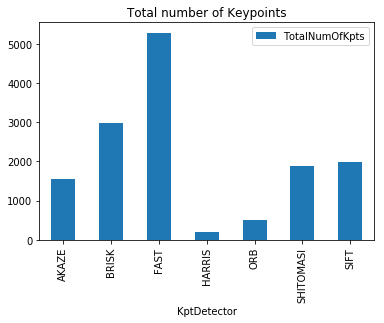

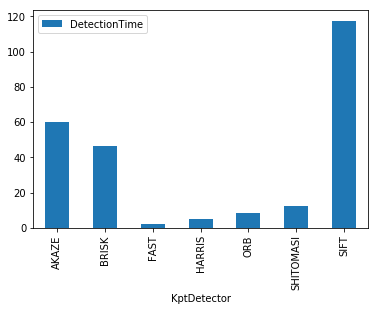

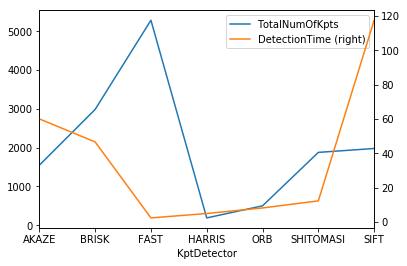

In [4]:
data.groupby('KptDetector').mean()[['TotalNumOfKpts']].plot.bar(title='Total number of Keypoints')
data.groupby('KptDetector').mean()[['DetectionTime']].plot.bar()
plt.show()

data.groupby('KptDetector').mean()[['TotalNumOfKpts','DetectionTime']].plot(secondary_y=['DetectionTime'])
plt.show()

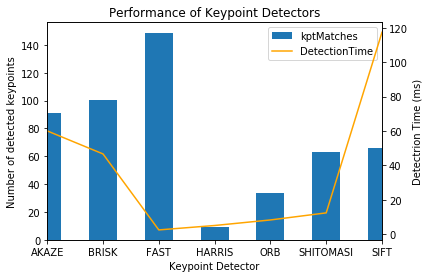

In [5]:
ax = data.groupby('KptDetector').mean()[['kptMatches']].plot.bar(title='Performance of Keypoint Detectors')
ax2 = data.groupby('KptDetector').mean()[['DetectionTime']].plot(secondary_y=['DetectionTime'], ax=ax, mark_right=False, color='orange')
ax.set_xlabel("Keypoint Detector")
ax.set_ylabel("Number of detected keypoints")
ax2.set_ylabel("Detectrion Time (ms)")

plt.show()

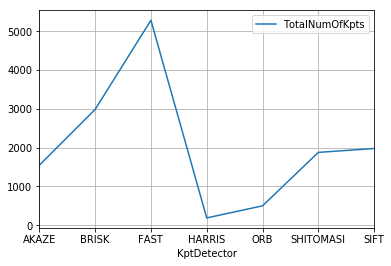

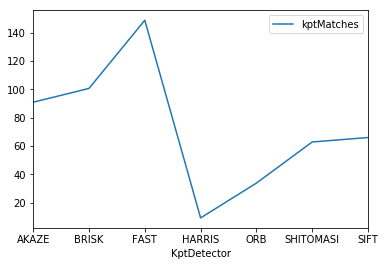

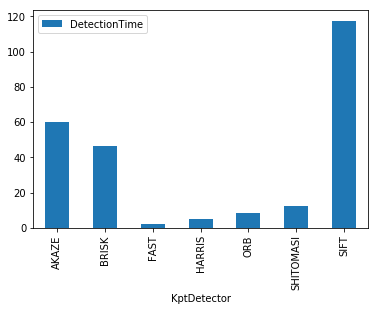

In [6]:
data.groupby('KptDetector').mean()[['TotalNumOfKpts']].plot(grid=True)
data.groupby('KptDetector').mean()[['kptMatches']].plot()
data.groupby('KptDetector').mean()[['DetectionTime']].plot.bar()
plt.show()

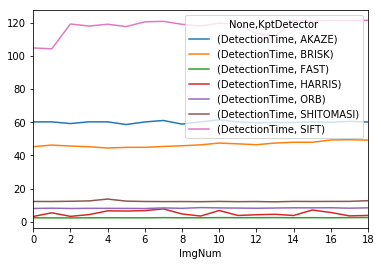

In [7]:
data.groupby(['ImgNum','KptDetector'])[['DetectionTime']].mean().unstack().plot()
plt.show()

Text(0.5, 0, 'Frame')

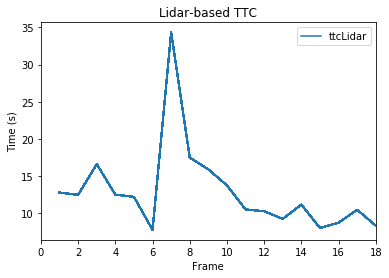

In [8]:
data.plot(x="ImgNum", y="ttcLidar", title="Lidar-based TTC")
plt.ylabel('Time (s)')
plt.xlabel('Frame')



In [9]:
data['TotalTime'] = data['DetectionTime'] + data['ExtractionTime'] # + data['MatchingTime']
data.groupby(['KptDetector','DescriptorType'])[['TotalNumOfKpts','kptMatches','DetectionTime','ExtractionTime','MatchingTime','NumOfMatches','TotalTime']].mean()
#ImgNum 	KptDetector 	TotalNumOfKpts 	DetectionTime 	NumrOfKptsInROI 	DescriptorType 	ExtractionTime 	Matcher 	Selector 	NumOfMatches 	MatchingTime

TotalNumOfKpts  kptMatches  DetectionTime  \
KptDetector DescriptorType                                              
AKAZE       AKAZE              1546.157895  105.000000      60.277079   
            BRIEF              1546.157895   92.555556      60.012221   
            BRISK              1546.157895   91.222222      59.931995   
            FREAK              1546.157895   72.444444      60.634289   
            ORB                1546.157895   68.277778      59.614858   
            SIFT               1546.157895  116.055556      59.835732   
BRISK       BRIEF              2983.526316  108.111111      46.859074   
            BRISK              2983.526316  109.555556      46.680968   
            FREAK              2983.526316   88.222222      46.756789   
            ORB                2983.526316   69.722222      46.636442   
            SIFT               2983.526316  127.611111      46.296026   
FAST        BRIEF              5281.947368  161.111111       2.420812   
            BRISK              5281.947368  126.111111       2.433377   
            FREAK              5281.947368   93.444444       2.400424   
            ORB                5281.947368  142.555556       2.422985   
            SIFT               5281.947368  220.611111       2.409736   
HARRIS      BRIEF               188.842105   10.500000       4.995901   
            BRISK               188.842105    7.722222       5.005210   
            FREAK               188.842105    6.611111       5.020318   
            ORB                 188.842105    9.277778       4.945632   
            SIFT                188.842105   12.437500       4.968843   
ORB         BRIEF               500.000000   26.888889       8.153727   
            BRISK               500.000000   41.687500       8.227128   
            FREAK               500.000000   23.000000       8.283351   
            ORB                 500.000000   31.312500       8.215226   
            SIFT                500.000000   47.000000       8.194581   
SHITOMASI   BRIEF              1877.210526   70.277778      12.280663   
            BRISK              1877.210526   52.555556      12.495995   
            FREAK              1877.210526   42.611111      12.455084   
            ORB                1877.210526   60.222222      12.206553   
            SIFT               1877.210526   88.555556      12.237416   
SIFT        BRIEF              1977.631579   64.611111     121.065553   
            BRISK              1977.631579   63.000000     123.344053   
            FREAK              1977.631579   46.444444     125.995421   
            SIFT               1977.631579   89.833333      99.506568   

                            ExtractionTime  MatchingTime  NumOfMatches  \
KptDetector DescriptorType                                               
AKAZE       AKAZE                61.759795     67.172156    970.666667   
            BRIEF                 6.197145     36.662522    864.555556   
            BRISK                16.316426     69.011122    824.055556   
            FREAK                54.363000     68.875383    622.166667   
            ORB                   5.708147     36.371117    573.888889   
            SIFT                 70.504079     42.992789   1167.722222   
BRISK       BRIEF                10.830863    132.344667   1257.277778   
            BRISK                31.876663    256.526389   1161.833333   
            FREAK                61.846674    174.480056    904.111111   
            ORB                   9.560455    131.276889    759.055556   
            SIFT                278.980368    160.057778   1754.333333   
FAST        BRIEF                15.988047    319.506722   2140.055556   
            BRISK                51.453205    719.329222   1559.055556   
            FREAK                79.802468    639.235222   1200.333333   
            ORB                   8.434126    307.738278   1815.500000   
            SIFT                224.131421    495.727667   3433.3888

In [10]:
data['TotalTime'] = data['DetectionTime'] + data['ExtractionTime'] # + data['MatchingTime']
data.groupby(['KptDetector','DescriptorType'])[['TotalNumOfKpts','kptMatches','DetectionTime']].mean()
#ImgNum 	KptDetector 	TotalNumOfKpts 	DetectionTime 	NumrOfKptsInROI 	DescriptorType 	ExtractionTime 	Matcher 	Selector 	NumOfMatches 	MatchingTime

TotalNumOfKpts  kptMatches  DetectionTime
KptDetector DescriptorType                                           
AKAZE       AKAZE              1546.157895  105.000000      60.277079
            BRIEF              1546.157895   92.555556      60.012221
            BRISK              1546.157895   91.222222      59.931995
            FREAK              1546.157895   72.444444      60.634289
            ORB                1546.157895   68.277778      59.614858
            SIFT               1546.157895  116.055556      59.835732
BRISK       BRIEF              2983.526316  108.111111      46.859074
            BRISK              2983.526316  109.555556      46.680968
            FREAK              2983.526316   88.222222      46.756789
            ORB                2983.526316   69.722222      46.636442
            SIFT               2983.526316  127.611111      46.296026
FAST        BRIEF              5281.947368  161.111111       2.420812
            BRISK              5281.947368  126.111111       2.433377
            FREAK              5281.947368   93.444444       2.400424
            ORB                5281.947368  142.555556       2.422985
            SIFT               5281.947368  220.611111       2.409736
HARRIS      BRIEF               188.842105   10.500000       4.995901
            BRISK               188.842105    7.722222       5.005210
            FREAK               188.842105    6.611111       5.020318
            ORB                 188.842105    9.277778       4.945632
            SIFT                188.842105   12.437500       4.968843
ORB         BRIEF               500.000000   26.888889       8.153727
            BRISK               500.000000   41.687500       8.227128
            FREAK               500.000000   23.000000       8.283351
            ORB                 500.000000   31.312500       8.215226
            SIFT                500.000000   47.000000       8.194581
SHITOMASI   BRIEF              1877.210526   70.277778      12.280663
            BRISK              1877.210526   52.555556      12.495995
            FREAK              1877.210526   42.611111      12.455084
            ORB                1877.210526   60.222222      12.206553
            SIFT               1877.210526   88.555556      12.237416
SIFT        BRIEF              1977.631579   64.611111     121.065553
            BRISK              1977.631579   63.000000     123.344053
            FREAK              1977.631579   46.444444     125.995421
            SIFT               1977.631579   89.833333      99.506568

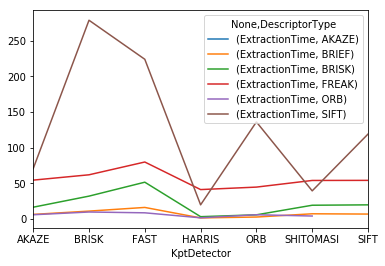

In [11]:
data.groupby(['KptDetector','DescriptorType'])[['ExtractionTime']].mean().unstack().plot()

In [12]:
data.columns
data['Combination'] = data['KptDetector'] + "-" + data['DescriptorType'] 
simple_data = data.drop(columns=['KptDetector', 'TotalNumOfKpts', 'DetectionTime','DescriptorType', 'ExtractionTime', 'Matcher', 'Selector','NumOfMatches', 'MatchingTime', 'ttcLidar', 'kptMatches'])



In [13]:
simple_data

,ImgNum,ttcCamera,TotalTime,Combination
0,0,NaN,30.53490,SHITOMASI-BRISK
1,1,12.82280,29.82840,SHITOMASI-BRISK
2,2,12.69680,31.44340,SHITOMASI-BRISK
3,3,14.47930,30.91790,SHITOMASI-BRISK
4,4,12.77790,36.24330,SHITOMASI-BRISK
5,5,12.26940,30.92110,SHITOMASI-BRISK
6,6,14.02070,31.43080,SHITOMASI-BRISK
7,7,12.79240,31.35590,SHITOMASI-BRISK
8,8,13.22850,30.85070,SHITOMASI-BRISK
9,9,11.73760,31.17980,SHITOMASI-BRISK


In [14]:
for combination in simple_data.Combination.unique():
    print(combination)

SHITOMASI-BRISK
SHITOMASI-BRIEF
SHITOMASI-ORB
SHITOMASI-FREAK
SHITOMASI-SIFT
HARRIS-BRISK
HARRIS-BRIEF
HARRIS-ORB
HARRIS-FREAK
HARRIS-SIFT
FAST-BRISK
FAST-BRIEF
FAST-ORB
FAST-FREAK
FAST-SIFT
BRISK-BRISK
BRISK-BRIEF
BRISK-ORB
BRISK-FREAK
BRISK-SIFT
ORB-BRISK
ORB-BRIEF
ORB-ORB
ORB-FREAK
ORB-SIFT
AKAZE-BRISK
AKAZE-BRIEF
AKAZE-ORB
AKAZE-FREAK
AKAZE-AKAZE
AKAZE-SIFT
SIFT-BRISK
SIFT-BRIEF
SIFT-FREAK
SIFT-SIFT


In [15]:
#for combination in simple_data.Combination.unique():
    #simple_data[simple_data.Combination == combination].plot(x="ImgNum", y="ttcCamera")



Text(0.5, 0, 'Frame')

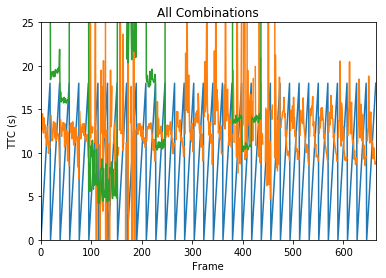

In [16]:
simple_data.plot(ylim=(0,25), legend=False, title='All Combinations')
plt.ylabel('TTC (s)')
plt.xlabel('Frame')

In [17]:
simple_data = simple_data.pivot(index='ImgNum', columns='Combination', values='ttcCamera')

#simple_data.plot()

Text(0.5, 0, 'Frame')

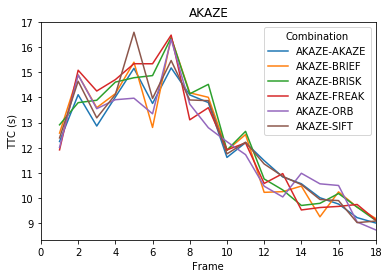

In [18]:
simple_data.filter(regex='AKAZE-').plot(title="AKAZE")
plt.ylabel('TTC (s)')
plt.xlabel('Frame')

Text(0.5, 0, 'Frame')

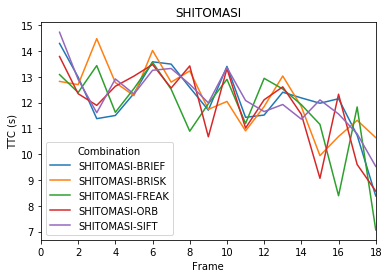

In [19]:
simple_data.filter(regex='SHITOMASI-').plot(title="SHITOMASI")
plt.ylabel('TTC (s)')
plt.xlabel('Frame')


Text(0.5, 0, 'Frame')

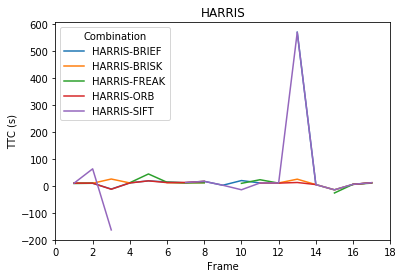

In [20]:
simple_data.filter(regex='HARRIS-').plot(title="HARRIS")
plt.ylabel('TTC (s)')
plt.xlabel('Frame')

Text(0.5, 0, 'Frame')

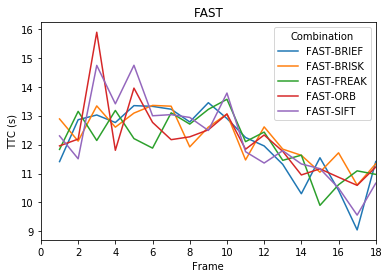

In [21]:
simple_data.filter(regex='FAST-').plot(title="FAST")
plt.ylabel('TTC (s)')
plt.xlabel('Frame')

Text(0.5, 0, 'Frame')

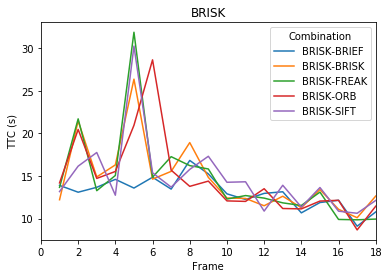

In [22]:
simple_data.filter(regex='BRISK-').plot(title="BRISK")
plt.ylabel('TTC (s)')
plt.xlabel('Frame')

Text(0.5, 0, 'Frame')

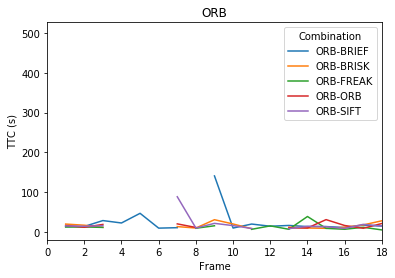

In [23]:
simple_data.filter(regex='ORB-').plot(title="ORB")
plt.ylabel('TTC (s)')
plt.xlabel('Frame')

Text(0.5, 0, 'Frame')

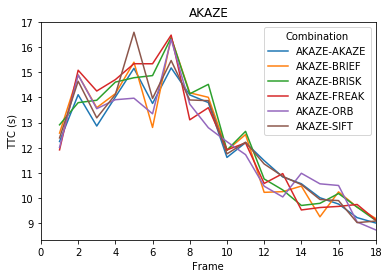

In [24]:
simple_data.filter(regex='AKAZE-').plot(title="AKAZE")
plt.ylabel('TTC (s)')
plt.xlabel('Frame')

Text(0.5, 0, 'Frame')

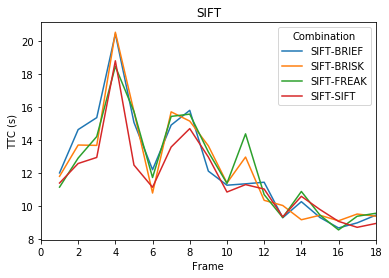

In [25]:
simple_data.filter(regex='SIFT-').plot(title="SIFT")
plt.ylabel('TTC (s)')
plt.xlabel('Frame')

Text(0.5, 0, 'Frame')

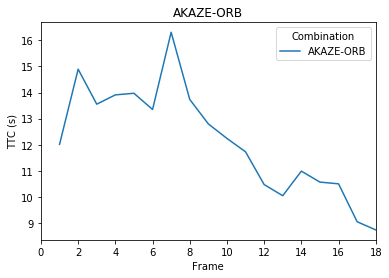

In [26]:
simple_data.filter(regex='AKAZE-ORB').plot(title="AKAZE-ORB")
plt.ylabel('TTC (s)')
plt.xlabel('Frame')